In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
metadata = pd.read_csv("E:/COVID_Research_Trends_Analysis/data/metadata.csv",low_memory=False)
#print(metadata.columns.tolist)
#print(metadata.shape)
#print(metadata.info())
#print(metadata.describe())
print(metadata.isnull().sum())
print(metadata.duplicated().sum())


cord_uid                           0
sha                            13374
source_x                           0
title                            158
doi                             3340
pmcid                           8746
pubmed_id                      14340
license                            0
abstract                        9231
publish_time                       8
authors                         2279
journal                         5242
Microsoft Academic Paper ID    51434
WHO #Covidence                 50630
has_pdf_parse                      0
has_pmc_xml_parse                  0
full_text_file                  8604
url                              302
dtype: int64
0


In [27]:
#drop null values
metadata=metadata[metadata["abstract"].notna()]

#print(metadata["publish_time"])
#converting publishtime to datetime
metadata["publish_time"]=pd.to_datetime(metadata["publish_time"],errors="coerce",format="%Y-%m-%d")

#papers published in 2020 or more
metadata=metadata[metadata["publish_time"]>="2020-01-01"]
#print(metadata.head(5))





C:\Users\anisb\AppData\Local\Temp\ipykernel_15032\1009405524.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pubs_per_month=metadata.set_index("publish_time").resample("M")["title"].count()


publish_time
2020-01-31     280
2020-02-29     778
2020-03-31    1597
2020-04-30    1247
2020-05-31      51
2020-06-30      49
2020-07-31      17
2020-08-31      17
2020-09-30       0
2020-10-31       1
2020-11-30       1
2020-12-31     108
Freq: ME, Name: title, dtype: int64


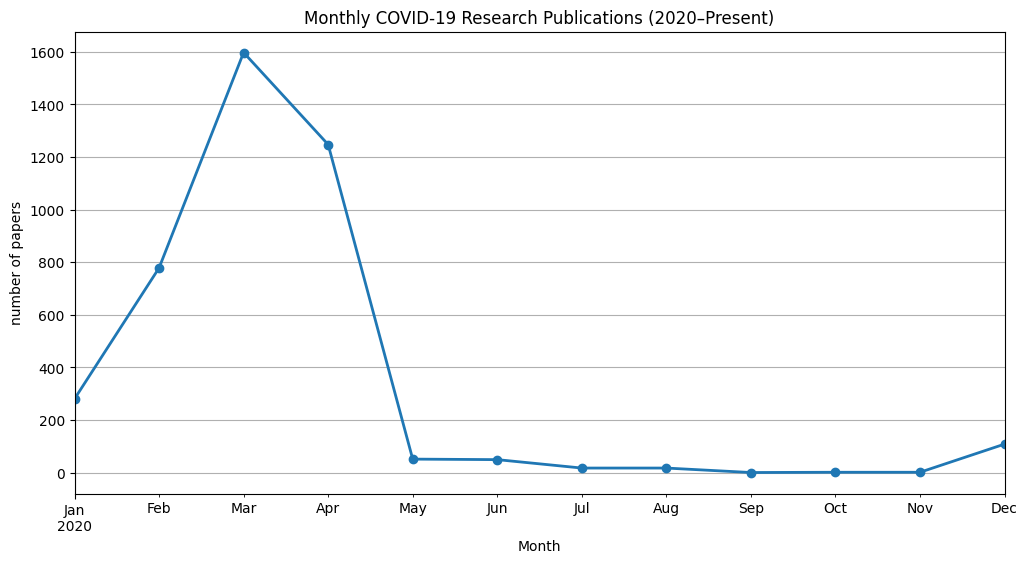

In [46]:
#visualization
#plotting the number of papers published each month
pubs_per_month=metadata.set_index("publish_time").resample("M")["title"].count()
print(pubs_per_month)
plt.figure(figsize=(12,6))
pubs_per_month.plot(kind="line",marker="o",color="#1f77b4",linewidth=2)
plt.title("Monthly COVID-19 Research Publications (2020–Present)")
plt.xlabel("Month")
plt.ylabel("number of papers")
plt.grid(True)
plt.savefig("E:/COVID_Research_Trends_Analysis/outputs/monthly_pubs.png", dpi=300, bbox_inches="tight")
plt.show()


